<h1>NETFLIX Movies and TV shows Data Exploration</h1>
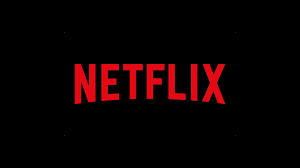

<h2>Dataset Content</h2>
<p>This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
</p>
<ul>Inspiration
    <li>Understanding what content is available in different countries</li>
    <li>Identifying similar content by matching text-based features</li>
    <li>Network analysis of Actors / Directors and find interesting insights</li>
    <li>Is Netflix has increasingly focusing on TV rather than movies in recent years.</li>
</ul>

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [15]:
df=pd.read_csv('C:/Users/ASUS/Downloads/netflix data visualization project/netflix data visualization/netflix_titles_nov_2019.csv')
print('Done!')

Done!


<h1>Data Investigation</h1>

In [16]:
def data_inv(df):
    print('netflix movies and shows: ',df.shape[0])
    print('dataset variables: ',df.shape[1])
    print('-'*10)
    print('dateset columns: \n')
    print(df.columns)
    print('-'*10)
    print('data-type of each column: \n')
    print(df.dtypes)
    print('-'*10)
    print('missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
data_inv(df)

netflix movies and shows:  5837
dataset variables:  12
----------
dateset columns: 

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')
----------
data-type of each column: 

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object
----------
missing rows in each column: 

director      1901
cast           556
country        427
date_added     642
rating          10
dtype: int64


<h1>Data Cleaning</h1>

In [17]:
dups=df.duplicated(['title','country','type','release_year'])
df[dups]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1134,80175351,Kakegurui,NaN,"Saori Hayami, Minami Tanaka, Tatsuya Tokutake,...",Japan,NaN,2019,TV-14,2 Seasons,"Anime Series, International TV Shows, TV Thril...",High roller Yumeko Jabami plans to clean house...,TV Show
1741,81072516,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,Movie


In [18]:
df=df.drop_duplicates(['title','country','type','release_year'])

In [19]:
df=df.drop('show_id',axis=1)

In [20]:
df['cast']=df['cast'].replace(np.nan,'Unknown')
def cast_counter(cast):
    if cast=='Unknown':
        return 0
    else:
        lst=cast.split(', ')
        length=len(lst)
        return length
df['number_of_cast']=df['cast'].apply(cast_counter)
df['cast']=df['cast'].replace('Unknown',np.nan)

In [21]:
df=df.reset_index()

In [22]:
df['rating']=df['rating'].fillna(df['rating'].mode()[0])

In [23]:
df['date_added']=df['date_added'].fillna('January 1, {}'.format(str(df['release_year'].mode()[0])))

In [24]:
for i,j in zip(df['country'].values,df.index):
    if i==np.nan:
        if ('Anime' in df.loc[j,'listed_in']) or ('anime' in df.loc[j,'listed_in']):
                df.loc[j,'country']='Japan'
        else:
            continue
    else:
        continue

In [25]:
import re
months={
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}
date_lst=[]
for i in df['date_added'].values:
    str1=re.findall('([a-zA-Z]+)\s[0-9]+\,\s[0-9]+',i)
    str2=re.findall('[a-zA-Z]+\s([0-9]+)\,\s[0-9]+',i)
    str3=re.findall('[a-zA-Z]+\s[0-9]+\,\s([0-9]+)',i)
    date='{}-{}-{}'.format(str3[0],months[str1[0]],str2[0])
    date_lst.append(date)

In [26]:
df['date_added_cleaned']=date_lst

In [27]:
df=df.drop('date_added',axis=1)

In [28]:
df['date_added_cleaned']=df['date_added_cleaned'].astype('datetime64[ns]')

<h1>Exploratory Data Analysis</h1>

<p>now, it is time to answer some questions.</p>
<ul>
    <li>Understand every category in rating column(Google it)</li>
    <li>Understanding what content is available in different countries.</li>
    <li>Is Netflix has increasingly focusing on TV rather than movies in recent years.</li>
    <li>The most observed rating categories in TV-shows and Movies </li>
    <li>Identifying similar content by matching text-based features</li>
    <li>How many content its release year differ from its year added</li>
</ul>

<p>let's now google the categories and explore them</p>
<ul>
    <li>TV-MA:This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.</li>
    <li>TV-14:This program contains some material that many parents would find unsuitable for children under 14 years of age.</li>
    <li>TV-PG:This program contains material that parents may find unsuitable for younger children.</li>
    <li>R:Under 17 requires accompanying parent or adult guardian,Parents are urged to learn more about the film before taking their young children with them.</li>
    <li>PG-13:Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.</li>
    <li>NR or UR:If a film has not been submitted for a rating or is an uncut version of a film that was submitted</li>
    <li>PG:Some material may not be suitable for children,May contain some material parents might not like for their young children.</li>
    <li>TV-Y7:This program is designed for children age 7 and above.</li>
    <li>TV-G:This program is suitable for all ages.</li>
    <li>TV-Y:Programs rated TV-Y are designed to be appropriate for children of all ages. The thematic elements portrayed in programs with this rating are specifically designed for a very young audience, including children ages 2-6.</li>
    <li>TV-Y7-FV:is recommended for ages 7 and older, with the unique advisory that the program contains fantasy violence.</li>
    <li>G:All ages admitted. Nothing that would offend parents for viewing by children.</li>
    <li>NC-17:No One 17 and Under Admitted. Clearly adult. Children are not admitted.</li>
</ul>



In [29]:
for i in df.index:
    if df.loc[i,'rating']=='UR':
        df.loc[i,'rating']='NR'

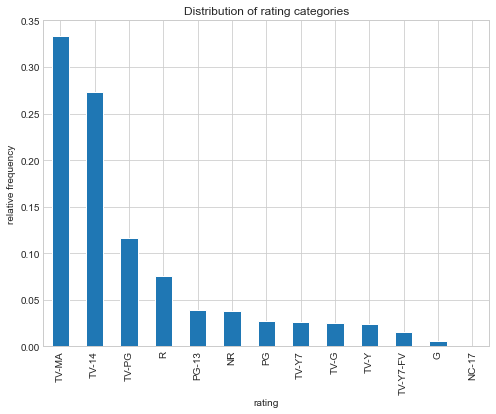

In [30]:
plt.figure(figsize=(8,6))
df['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

<p><p> after expecting the distribution of rating ctegories, it is abvious that TV-MA is the mode<br>
    TV-14 comes in the second place and so on...<br></p>

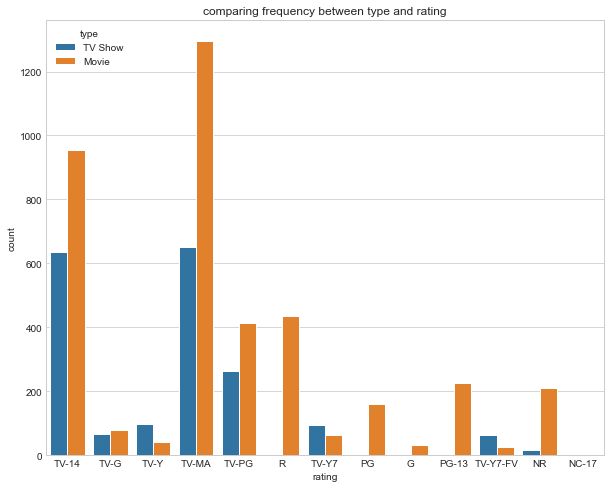

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('comparing frequency between type and rating')
plt.show()

<p>We can say that Movies is the majority category in every rating category on Netflix, except(TV-Y,TV-Y7,TV-Y7-FV).</p> 

In [32]:
df['country'].value_counts().sort_values(ascending=False)

United States                                                                                               1907
India                                                                                                        696
United Kingdom                                                                                               336
Japan                                                                                                        167
Canada                                                                                                       139
                                                                                                            ... 
United Arab Emirates, Jordan                                                                                   1
Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands       1
Canada, United Kingdom, Netherlands                                                             

<p>we have huge number of countries in country column so we will focus on (United States,India,United Kingdom,Japan,Canada,Spain)</p>

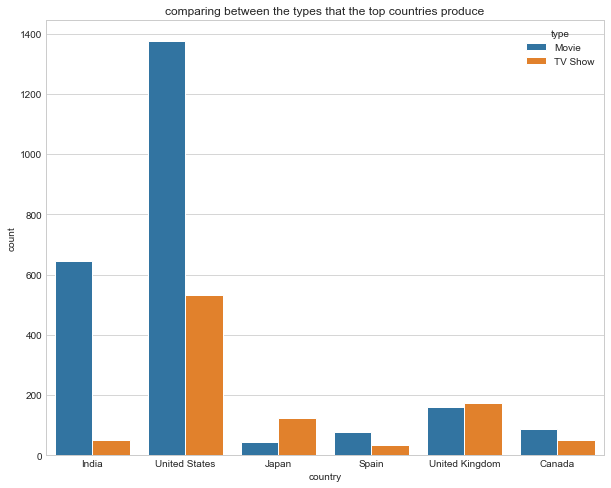

In [33]:
top_productive_countries=df[(df['country']=='United States')|(df['country']=='India')|(df['country']=='United Kingdom')|(df['country']=='Japan')|
                             (df['country']=='Canada')|(df['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

<p>UK and Japan produces TV-Shows more than Movies</p>

In [34]:
for i in top_productive_countries['country'].unique():
    print(i)
    print(top_productive_countries[top_productive_countries['country']==i]['rating'].value_counts(normalize=True)*100)
    print('-'*10)

India
TV-14       53.160920
TV-MA       23.419540
TV-PG       17.097701
NR           2.873563
TV-G         1.005747
TV-Y7        0.718391
PG-13        0.574713
PG           0.431034
TV-Y7-FV     0.287356
R            0.287356
TV-Y         0.143678
Name: rating, dtype: float64
----------
United States
TV-MA       31.515469
TV-14       17.409544
R           12.165705
TV-PG       10.854746
PG-13        7.079182
PG           4.876770
NR           4.824331
TV-G         3.198741
TV-Y7        2.621919
TV-Y7-FV     2.097535
TV-Y         2.045097
G            1.258521
NC-17        0.052438
Name: rating, dtype: float64
----------
Japan
TV-14       46.107784
TV-MA       25.748503
TV-PG       10.179641
NR           7.185629
TV-Y7        5.389222
PG-13        1.796407
TV-Y7-FV     1.197605
TV-Y         1.197605
PG           0.598802
TV-G         0.598802
Name: rating, dtype: float64
----------
Spain
TV-MA    64.601770
TV-14    19.469027
NR        7.079646
TV-PG     3.539823
PG        1.769912
R    

<p>now let's see if Netflix focuse on TV rather than movies in recent years(2017-2018-2019)</p>

In [35]:
df['year_added']=df['date_added_cleaned'].dt.year

In [36]:
df['type'].value_counts(normalize=True)

Movie      0.674893
TV Show    0.325107
Name: type, dtype: float64

<p>relative freuency of movies still has the lead</p>

In [37]:
df.groupby('year_added')['type'].value_counts(normalize=True)*100

year_added  type   
2008        Movie       50.000000
            TV Show     50.000000
2009        Movie      100.000000
2010        Movie      100.000000
2011        Movie      100.000000
2012        Movie       57.142857
            TV Show     42.857143
2013        Movie       66.666667
            TV Show     33.333333
2014        Movie      100.000000
2015        Movie       78.378378
            TV Show     21.621622
2016        Movie       64.077670
            TV Show     35.922330
2017        Movie       77.111486
            TV Show     22.888514
2018        Movie       56.872247
            TV Show     43.127753
2019        Movie       74.158523
            TV Show     25.841477
Name: type, dtype: float64

<p>We can say that Netflix begin to focus on TV-Shows,but Movies still has the lead in evey year.</p>

In [38]:
dups=df.duplicated(['title'])
df[dups]['title']

212                                      Drive
511                                     Tunnel
1243                                 Supergirl
1286                                 Limitless
1706                                    Shadow
2360                               Oh My Ghost
2410                                  Love O2O
2765                                    Bleach
2801                                   One Day
2871                             The Innocents
2932                          The Birth Reborn
3048                               Oh My Ghost
3212                               Us and Them
3433                                      Troy
3483                                 Locked Up
3583                                      Love
3585                              The Outsider
3591                                     Benji
3658                                      Solo
3669                               The Silence
3670                               The Silence
3882         

<p>this titles have one or more contents</p>

In [39]:
for i in df[dups]['title'].values:
    print(df[df['title']==i][['title','type','release_year','country']])
    print('-'*40)

     title   type  release_year        country
101  Drive  Movie          2011  United States
212  Drive  Movie          2019          India
----------------------------------------
       title     type  release_year      country
303   Tunnel  TV Show          2019          NaN
511   Tunnel  TV Show          2017  South Korea
4659  Tunnel    Movie          2016  South Korea
----------------------------------------
          title     type  release_year                        country
492   Supergirl    Movie          1984  United Kingdom, United States
1243  Supergirl  TV Show          2019                  United States
----------------------------------------
          title     type  release_year        country
474   Limitless    Movie          2017          India
1286  Limitless    Movie          2011  United States
5536  Limitless  TV Show          2016  United States
----------------------------------------
       title     type  release_year           country
154   Shadow    Mov

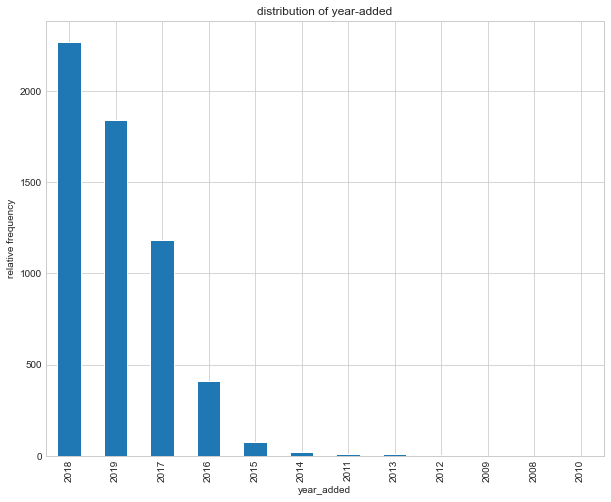

In [40]:
plt.figure(figsize=(10,8))
df['year_added'].value_counts().plot.bar()
plt.title('distribution of year-added')
plt.ylabel('relative frequency')
plt.xlabel('year_added')
plt.show()

<p>2018 is remarkable year for netflix</p>

In [41]:
counts=0
for i,j in zip(df['release_year'].values,df['year_added'].values):
    if i!=j:
        counts+=1
print('number of contents that its release year differ from the year added to netflix are ',str(counts))

number of contents that its release year differ from the year added to netflix are  3971
